In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from seaborn           import heatmap
import time
import time
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

In [2]:
df=pd.read_csv("HR_Employee_Attrition_Data.csv")
print(df.shape)
print(df.columns)

(2940, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [3]:
df.shape

(2940, 35)

In [5]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


# Checking missing values

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


No     2466
Yes     474
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

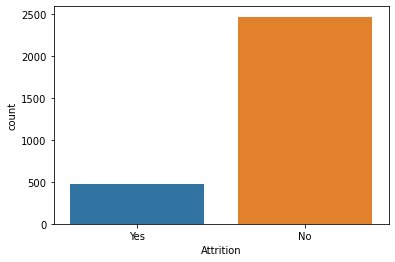

In [6]:
# to count the number of employees that stayed and left the company
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition', data=df)

In [7]:
# percent of employees left
print ('% of employes left =', (len(df[df['Attrition']=='Yes'])/len(df['Attrition'])*100))

% of employes left = 16.122448979591837


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

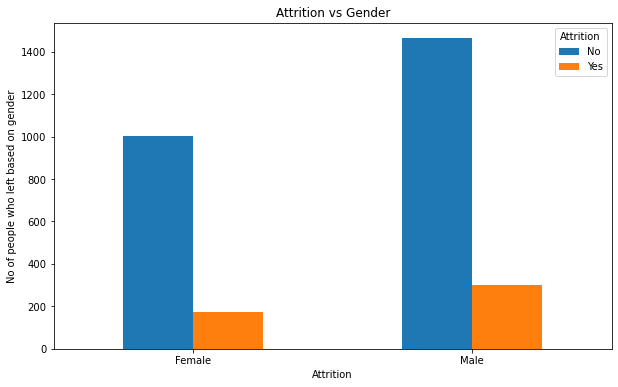

In [8]:
# understanding the role of gender in attrition
pd.crosstab(df['Gender'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.xticks(rotation=0)

### Effect of overtime on attrition

Text(0, 0.5, 'No of people who left based on Overtime')

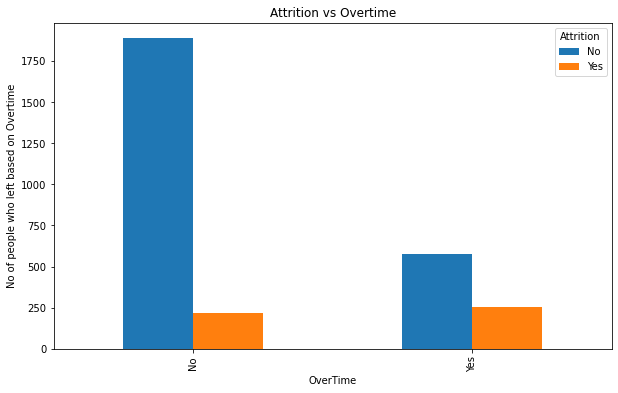

In [9]:
pd.crosstab(df['OverTime'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Overtime")
plt.ylabel("No of people who left based on Overtime")

In [10]:
 #percent of people who were made to do overtime left the company

(len(df.loc[(df['OverTime']=='Yes') & (df['Attrition']=='Yes')])/len(df.loc[df['OverTime']=='Yes']))*100

30.528846153846157

##### Department wise attrition

Text(0, 0.5, 'No of people who left based on Department')

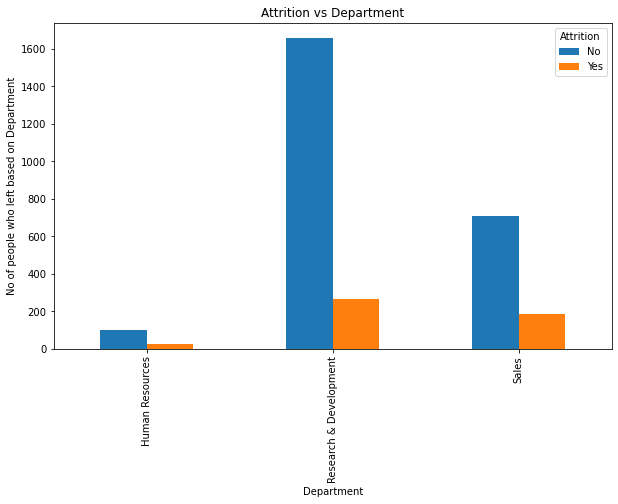

In [11]:
pd.crosstab(df['Department'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Department")
plt.ylabel("No of people who left based on Department")

In [12]:
r1= len(df.loc[(df['Department']=='Research & Development') & (df['Attrition']=='Yes')])/len(df.loc[(df['Department']=='Research & Development')])*100
r2=len(df.loc[(df['Department']=='Sales') & (df['Attrition']=='Yes')])/len(df.loc[(df['Department']=='Sales')])*100
r3=len(df.loc[(df['Department']=='Human Resources') & (df['Attrition']=='Yes')])/len(df.loc[(df['Department']=='Human Resources')])*100

In [13]:
print(f'% of Attrition in Research & Development = {r1}')
print(f'% of Attrition in Sales = {r2}')
print(f'% of Attrition in Human Resources = {r3}')

## Attrition is highest in Sales department.

% of Attrition in Research & Development = 13.839750260145681
% of Attrition in Sales = 20.62780269058296
% of Attrition in Human Resources = 19.047619047619047


### Effect of travelling on sales people

In [14]:


rs1= len(df.loc[(df['Department']=='Sales') &(df['BusinessTravel']=='Non-Travel')])/len(df.loc[(df['Department']=='Sales')])*100

rs2= len(df.loc[(df['Department']=='Sales') & (df['BusinessTravel']=='Non-Travel')& (df['Attrition']=='Yes')])/len(df.loc[(df['Department']=='Sales')])*100

print(f'no. of people from sales that didnot travel= {rs1}')
print(f'no. of people from sales that didnot travel and left the company = {rs2}')

rs3=len(df.loc[(df['Department']=='Sales') &(df['BusinessTravel']=='Travel_Rarely')])/len(df.loc[(df['Department']=='Sales')])*100
rs4= len(df.loc[(df['Department']=='Sales') & (df['BusinessTravel']=='Travel_Rarely')& (df['Attrition']=='Yes')])/len(df.loc[(df['Department']=='Sales')])*100

print(f'no. of people from sales that travelled rarely= {rs3}')
print(f'no. of people from sales that travelled rarely and left= {rs4}')

no. of people from sales that didnot travel= 10.538116591928251
no. of people from sales that didnot travel and left the company = 0.8968609865470852
no. of people from sales that travelled rarely= 70.62780269058297
no. of people from sales that travelled rarely and left= 13.452914798206278


### distribution of monthly income in different departments

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

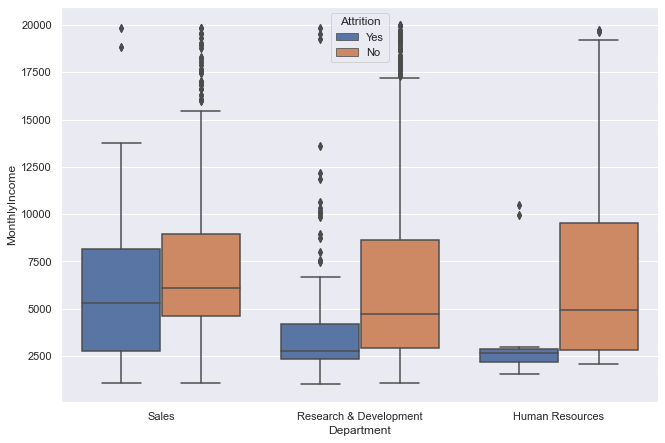

In [15]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.boxplot(y=df['MonthlyIncome'], x=df['Department'], hue=df['Attrition'])

### distribution of PercentSalaryHike in different departments

<AxesSubplot:xlabel='Department', ylabel='PercentSalaryHike'>

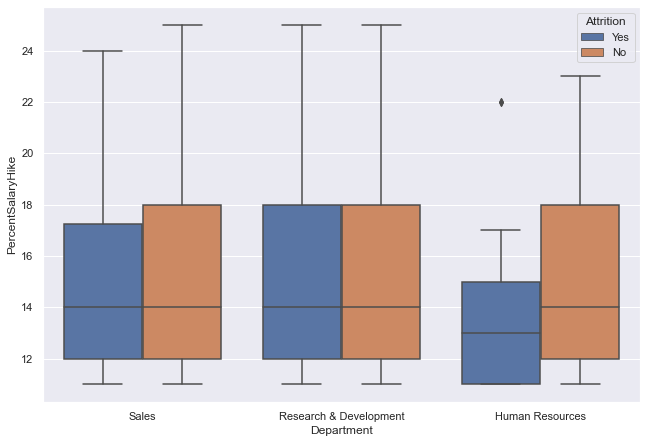

In [16]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.boxplot(y=df['PercentSalaryHike'], x=df['Department'], hue=df['Attrition'])

### distribution of YearsAtCompany in different departments

<AxesSubplot:xlabel='Department', ylabel='YearsAtCompany'>

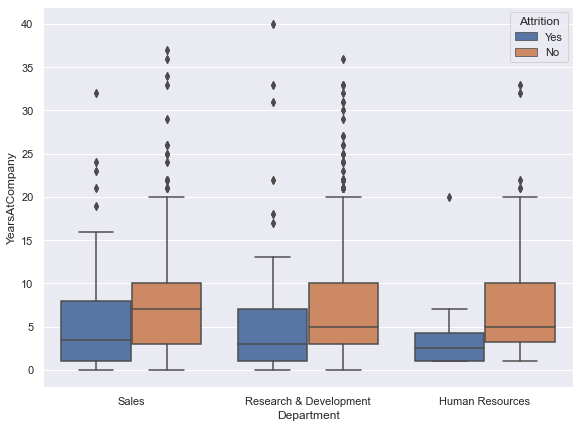

In [17]:
sns.set(rc={'figure.figsize':(9.5,7.0)})
sns.boxplot(y=df['YearsAtCompany'], x=df['Department'], hue=df['Attrition'])

### Attrition is higher in Sales and HR as compared to R&D
- people with lower monthly incmes have left
- people from HR have the lowest monthly incomes
- people from Sales and HR with lower percent salary hike have left
- people from HR who have spent less than 5 years and from Sales and R&D who have spent less than ~8 years have left


### effect of YearsSinceLastPromotion 

Text(0, 0.5, 'No of people who left based on YearsSinceLastPromotion')

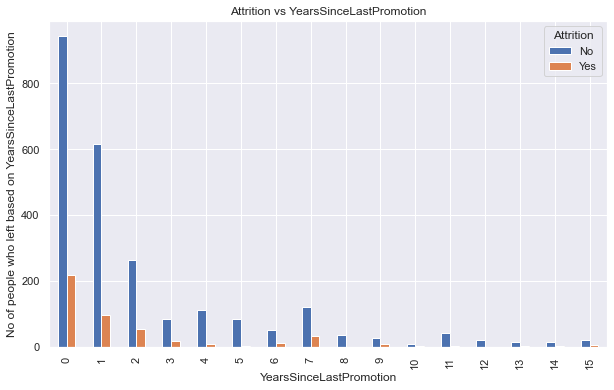

In [18]:
pd.crosstab(df['YearsSinceLastPromotion'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs YearsSinceLastPromotion")
plt.ylabel("No of people who left based on YearsSinceLastPromotion")



## higher attrition is seen among the people who have just been promoted 

### Effect of education and environment satisfaction on attrition

Text(0, 0.5, 'No of people who left based on BusinessTravel')

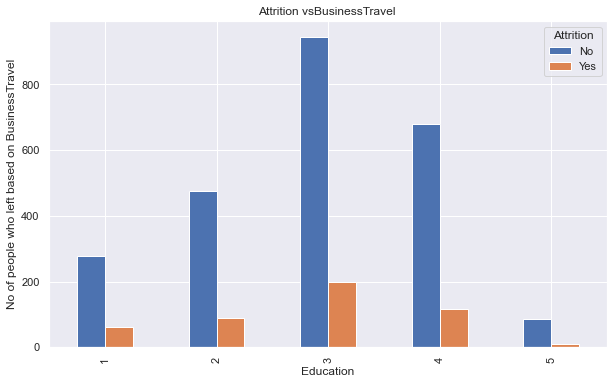

In [19]:
pd.crosstab(df['Education'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vsBusinessTravel ")
plt.ylabel("No of people who left based on BusinessTravel")


## higher attrition is seen among the people with level 3 education 

Text(0, 0.5, 'No of people who left based on EnvironmentSatisfaction ')

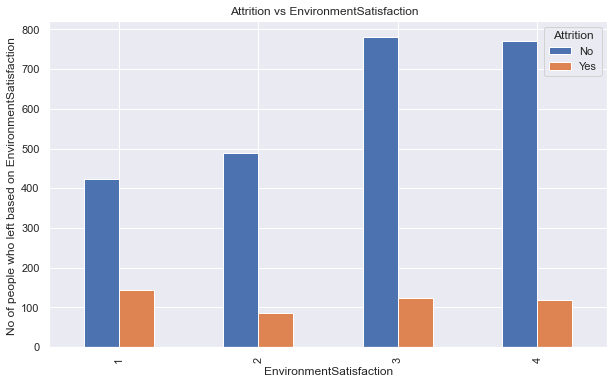

In [20]:

pd.crosstab(df['EnvironmentSatisfaction'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs EnvironmentSatisfaction  ")
plt.ylabel("No of people who left based on EnvironmentSatisfaction ")


## higher attrition is seen among the people who had level 1 satisfaction with the environment

In [7]:
df_hr=df.copy()

## dropping the redundant columns

In [8]:
df_hr=df.drop(labels=['EmployeeNumber' ,'Over18'], axis=1)

In [9]:
df_hr.shape

(2940, 33)

### Identifying Categorical variables

In [10]:
cat= df_hr.select_dtypes(include=['object']).columns.tolist()
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [11]:
for col in df_hr.columns:
    print(col, ':', len(df_hr[col].unique()), 'labels')     # to find the number of unique values in each column

Age : 43 labels
Attrition : 2 labels
BusinessTravel : 3 labels
DailyRate : 886 labels
Department : 3 labels
DistanceFromHome : 29 labels
Education : 5 labels
EducationField : 6 labels
EmployeeCount : 1 labels
EnvironmentSatisfaction : 4 labels
Gender : 2 labels
HourlyRate : 71 labels
JobInvolvement : 4 labels
JobLevel : 5 labels
JobRole : 9 labels
JobSatisfaction : 4 labels
MaritalStatus : 3 labels
MonthlyIncome : 1349 labels
MonthlyRate : 1427 labels
NumCompaniesWorked : 10 labels
OverTime : 2 labels
PercentSalaryHike : 15 labels
PerformanceRating : 2 labels
RelationshipSatisfaction : 4 labels
StandardHours : 1 labels
StockOptionLevel : 4 labels
TotalWorkingYears : 40 labels
TrainingTimesLastYear : 7 labels
WorkLifeBalance : 4 labels
YearsAtCompany : 37 labels
YearsInCurrentRole : 19 labels
YearsSinceLastPromotion : 16 labels
YearsWithCurrManager : 18 labels


## Label Encoding
### For variables with 2 unique values


In [12]:
lab_col= ['Attrition', 'Gender','OverTime' 'PerformanceRating']

In [13]:
le=LabelEncoder()

In [14]:
df_hr['Attrition']=le.fit_transform(df_hr['Attrition'])
df_hr['Gender']=le.fit_transform(df_hr['Gender'])
df_hr['OverTime']=le.fit_transform(df_hr['OverTime'])
df_hr['PerformanceRating']=le.fit_transform(df_hr['PerformanceRating'])

In [16]:
df_hr.shape

(2940, 33)

## Onehot encoding
### for variables with more than 2 unique values

In [17]:
# number of new columms that will be formed after onehot encoding
pd.get_dummies(df_hr, drop_first=True).shape

(2940, 47)

In [18]:
# converting categorical data into dummy variables
dum_col=['BusinessTravel',
 'Department',
 'EducationField',
  'JobRole',
 'MaritalStatus']
data= df_hr[dum_col]
# data
df_dummies= pd.get_dummies(data)
df_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [19]:
# merging the dummy variables into the dataset
df_merged= pd.concat([df_hr, df_dummies], axis='columns')
# df_merged.columns

In [20]:
# drop the original categorical columns
df_fin = df_merged.drop(data, axis='columns')
# df_fin.columns

In [21]:
(len(df_fin.columns))

52

# defining X and y

In [22]:
X=df_fin.drop(labels=['Attrition'], axis=1)
y=df_fin['Attrition']
names_index =X.columns

In [23]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(X.apply(lambda x : unique_levels(x)))

In [24]:
df_value_counts.columns=['feature_levels']
slice = df_value_counts.loc[df_value_counts['feature_levels']>20]
slice.head()

,feature_levels
Age,43
DailyRate,886
DistanceFromHome,29
HourlyRate,71
MonthlyIncome,1349


In [25]:
X_list=slice.index

X_list
X1 = X.loc[:,X_list]
X1

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,94,5993,19479,8,6
1,49,279,8,61,5130,24907,10,10
2,37,1373,2,92,2090,2396,7,0
3,33,1392,3,56,2909,23159,8,8
4,27,591,2,40,3468,16632,6,2
...,...,...,...,...,...,...,...,...
2935,36,884,23,41,2571,12290,17,5
2936,39,613,6,42,9991,21457,9,7
2937,27,155,4,87,6142,5174,6,6
2938,49,1023,2,63,5390,13243,17,9


# Flooring and Capping of outliers

In [26]:

def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [27]:
X1=X1.apply(lambda x : outlier_cap(x))

In [28]:
X1.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.921871,802.482993,9.192517,65.891156,6503.306156,14312.605544,11.268707,6.980272
std,9.104845,403.191626,8.105485,20.325969,4699.853209,7110.879597,7.709195,6.003879
min,19.000000,117.000000,1.000000,30.000000,1372.260000,2324.170000,1.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1380.348600,2324.883700,1.000000,0.000000
5%,24.000000,164.000000,1.000000,33.000000,2097.000000,3376.000000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,15.000000,9.000000


In [29]:
X1.shape

(2940, 8)

In [30]:
X = X.drop(X_list, axis='columns')
X= pd.concat([X, X1], axis='columns')


In [31]:
X.shape

(2940, 51)

In [32]:
X.columns

Index(['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole

# train and test split

In [33]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2058, 51), (882, 51))

# zero variance check

In [34]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [35]:
var_thres.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [36]:
# number of zero variance columns
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))


2


In [37]:
for column in constant_columns:
    print(column)


EmployeeCount
StandardHours


## dropping columns with no variance

In [40]:
# X_train= X_train.drop(constant_columns,axis=1)
# X_test= X_test.drop(constant_columns,axis=1)
print(X_train.shape, X_test.shape)

(2058, 49) (882, 49)


# checking correlation

In [41]:
corrmat= X_train.corr()

In [42]:
# to select the highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

6

In [44]:
corr_features

{'JobRole_Human Resources',
 'JobRole_Sales Executive',
 'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany'}

In [45]:
# dropping the correlated features
X_train= X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)


In [46]:
X_test.iloc[:1,:].values


array([[4.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
        6.000e+00, 0.000e+00, 1.300e+01, 2.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 9.000e+00, 0.000e+00, 8.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 3.500e+01, 8.820e+02, 3.000e+00, 9.200e+01,
        6.812e+03]])

In [47]:
(X_test.shape)

(882, 43)

In [48]:
X_test.shape

(882, 43)

# standardization

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
(y_train.shape)

(2058,)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_knn = KNeighborsClassifier()
model_svc = SVC()
model_nb = GaussianNB()

# Decision Tree

In [53]:
model_dt.fit(X_train, y_train)
y_pred_dt =model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Random Forest

In [54]:
model_rf.fit(X_train, y_train)
y_pred_rf =model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# KNN

In [55]:

model_knn.fit(X_train, y_train)
y_pred_knn =model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM

In [56]:

model_svc.fit(X_train, y_train)
y_pred_svc =model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Naive Bayes

In [57]:

model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Comparing accuracies from different classification algorithms

In [58]:
print(f'the accuracy for Decision Tree is {accuracy_dt}')
print(f'the accuracy for Random forest is {accuracy_rf}')
print(f'the accuracy for KNN is {accuracy_knn}')
print(f'the accuracy for SVM is {accuracy_svc}')
print(f'the accuracy for Naive Bayes is {accuracy_nb}')            

the accuracy for Decision Tree is 0.9410430839002267
the accuracy for Random forest is 0.9614512471655329
the accuracy for KNN is 0.8605442176870748
the accuracy for SVM is 0.9047619047619048
the accuracy for Naive Bayes is 0.7040816326530612


In [59]:
# Since RF got the highest accuracy, we can evaluate the model further
X_train.shape

(2058, 43)

# Hyperparameter tuning for Random forest

In [75]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [10,15,20,25,30,40],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2','None'],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.93052806 0.93052096 0.92518115        nan 0.94413687 0.94365143
 0.943166          nan 0.94170732 0.94461994 0.94365143        nan
 0.94413687 0.94365143 0.94607862        nan 0.94170969 0.94413687
 0.94268056        nan 0.94413687 0.94365143 0.943166          nan
 0.92615439 0.92275633 0.9193488         nan 0.94316363 0.94510774
 0.94365143        nan 0.94365143 0.94413687 0.943166          nan
 0.94170732 0.9441345  0.94268056        nan 0.943166   0.94364906
 0.94559318        nan 0.94316363 0.94510774 0.94365143        nan]
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 25, 'max_features': 'log2'}
Time taken in grid search:  187.11


In [76]:
model_rf.set_params(criterion = 'gini',
                  max_features = 'log2', 
                  max_depth = 25)

RandomForestClassifier(max_depth=25, max_features='log2')

In [77]:
model_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 101
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(X_train,y_train)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error

In [78]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

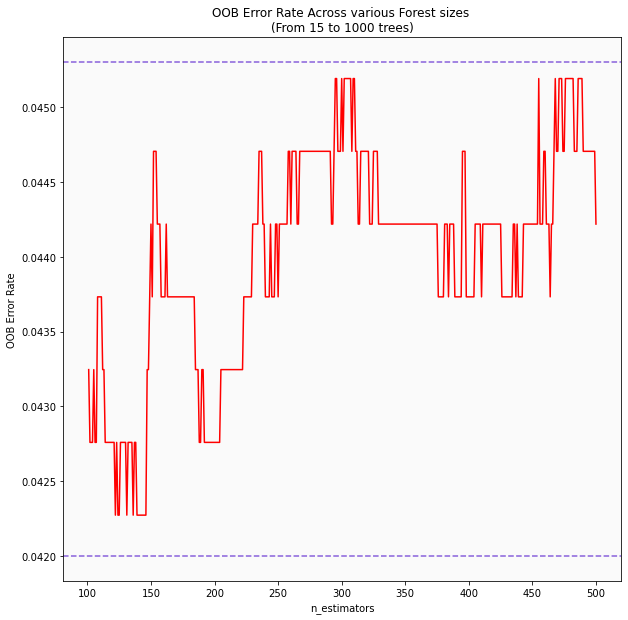

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.0453, color='#875FDB',linestyle='--')
plt.axhline(0.042, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [82]:
print('OOB Error rate for 350 trees is: {0:.5f}'.format(oob_series[350]))

OOB Error rate for 350 trees is: 0.04422


In [83]:
# Refine the tree via OOB Output
model_rf.set_params(n_estimators=350,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=25, max_features='log2', n_estimators=350)

In [84]:
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.961


In [107]:
X_train.shape

(2058, 43)

# Confusion matrix

In [85]:
def create_conf_mat(y_test, predictions_rf):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions_rf.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions_rf.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions_rf)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

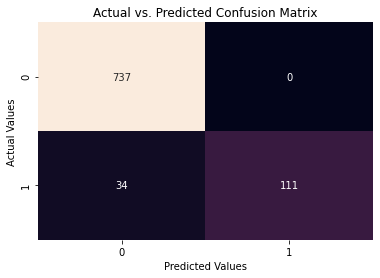

In [86]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

# Classification report

In [89]:
dx= ['No', 'Yes']
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:a
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions_rf, 
            y_test, 
            target_names = dx))

In [90]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

          No       1.00      0.96      0.98       771
         Yes       0.77      1.00      0.87       111

    accuracy                           0.96       882
   macro avg       0.88      0.98      0.92       882
weighted avg       0.97      0.96      0.96       882



# AUC

In [91]:
pred_prob_rf = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_prob_rf,pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

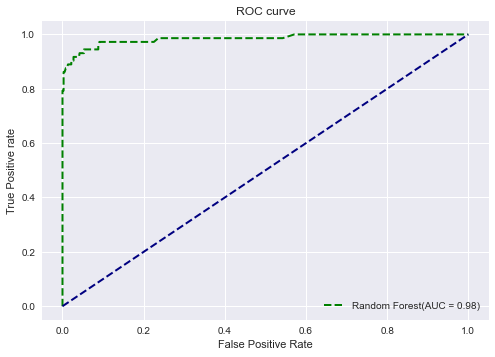

In [92]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure()
lw = 2
# plot roc curves
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='green', 
        lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();